In [1]:
!wget https://github.com/gbiamgaurav/datasets/raw/main/Agri%20data/Agri_data.csv

--2023-06-14 14:14:42--  https://github.com/gbiamgaurav/datasets/raw/main/Agri%20data/Agri_data.csv
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gbiamgaurav/datasets/main/Agri%20data/Agri_data.csv [following]
--2023-06-14 14:14:42--  https://raw.githubusercontent.com/gbiamgaurav/datasets/main/Agri%20data/Agri_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 319456 (312K) [text/plain]
Saving to: ‘Agri_data.csv.3’

Agri_data.csv.3     100%[===================>] 311.97K  --.-KB/s    in 0.006s  

2023-06-14 14:14:43 (55.3 MB/s) - ‘Agri_data.csv.3’ saved [319456/319456]



In [2]:
## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/Agri_data.csv")

In [4]:
df.head(3)

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,VegType,N2O,N_rate,...,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2-9-12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.896742,170,...,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2-10-12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,2.190218,170,...,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2-18-12,2012,BCSE_KBS,Building,R1,February,Corn,Annual,3.542594,170,...,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072


In [5]:
## Shape of the data

df.shape

(2246, 21)

In [6]:
## Check the info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2194 non-null   float64
 16  NH4          2170 non-null   float64
 17  NO3          2216 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

In [7]:
## Check for missing values

df.isnull().sum()

Date            0
Year            0
Experiment      0
DataUse         0
Replication     0
Month           0
Vegetation      0
VegType         0
N2O             0
N_rate          0
PP2             0
PP7             0
AirT            0
DAF_TD          0
DAF_SD          0
WFPS25cm       52
NH4            76
NO3            30
Clay            0
Sand            0
SOM             0
dtype: int64

There are missing values in WFPS25cm, NH4 and NO3

In [8]:
df[["WFPS25cm", "NH4", "NO3"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WFPS25cm  2194 non-null   float64
 1   NH4       2170 non-null   float64
 2   NO3       2216 non-null   float64
dtypes: float64(3)
memory usage: 52.8 KB


In [9]:
df[["WFPS25cm", "NH4", "NO3"]].describe()

,WFPS25cm,NH4,NO3
count,2194.000000,2170.000000,2216.000000
mean,0.531047,11.451364,24.997063
std,0.171868,13.214895,24.941785
min,0.024388,1.383393,0.370070
25%,0.390203,5.290323,10.184722
50%,0.553853,9.081282,19.795863
75%,0.680321,12.140325,27.085459
max,0.912113,228.525000,238.920000


They are numerical values, we can fill them by median values

In [10]:
# Calculate the median for each column
median_values = df[["WFPS25cm", "NH4", "NO3"]].median()

# Fill NaN values in the specified columns with their respective medians
df[["WFPS25cm", "NH4", "NO3"]] = df[["WFPS25cm", "NH4", "NO3"]].fillna(median_values)

In [11]:
## Checking for null values again

df.isnull().sum()

Date           0
Year           0
Experiment     0
DataUse        0
Replication    0
Month          0
Vegetation     0
VegType        0
N2O            0
N_rate         0
PP2            0
PP7            0
AirT           0
DAF_TD         0
DAF_SD         0
WFPS25cm       0
NH4            0
NO3            0
Clay           0
Sand           0
SOM            0
dtype: int64

There are no missing values now

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2246 non-null   object 
 1   Year         2246 non-null   int64  
 2   Experiment   2246 non-null   object 
 3   DataUse      2246 non-null   object 
 4   Replication  2246 non-null   object 
 5   Month        2246 non-null   object 
 6   Vegetation   2246 non-null   object 
 7   VegType      2246 non-null   object 
 8   N2O          2246 non-null   float64
 9   N_rate       2246 non-null   int64  
 10  PP2          2246 non-null   float64
 11  PP7          2246 non-null   float64
 12  AirT         2246 non-null   float64
 13  DAF_TD       2246 non-null   int64  
 14  DAF_SD       2246 non-null   int64  
 15  WFPS25cm     2246 non-null   float64
 16  NH4          2246 non-null   float64
 17  NO3          2246 non-null   float64
 18  Clay         2246 non-null   float64
 19  Sand  

Date column is of object type lets convert it to datetime

In [13]:
df["Date"] = pd.to_datetime(df["Date"])

<ipython-input-13-cc2372053ca6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date"] = pd.to_datetime(df["Date"])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2246 non-null   datetime64[ns]
 1   Year         2246 non-null   int64         
 2   Experiment   2246 non-null   object        
 3   DataUse      2246 non-null   object        
 4   Replication  2246 non-null   object        
 5   Month        2246 non-null   object        
 6   Vegetation   2246 non-null   object        
 7   VegType      2246 non-null   object        
 8   N2O          2246 non-null   float64       
 9   N_rate       2246 non-null   int64         
 10  PP2          2246 non-null   float64       
 11  PP7          2246 non-null   float64       
 12  AirT         2246 non-null   float64       
 13  DAF_TD       2246 non-null   int64         
 14  DAF_SD       2246 non-null   int64         
 15  WFPS25cm     2246 non-null   float64       
 16  NH4   

<Axes: xlabel='Year', ylabel='N2O'>

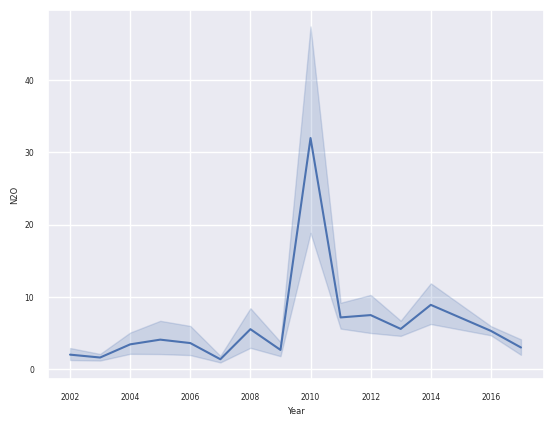

In [15]:
plt.figure()
sns.set(font_scale=0.5)
sns.lineplot(x=df["Year"], y=df["N2O"])

<Axes: xlabel='Month', ylabel='N2O'>

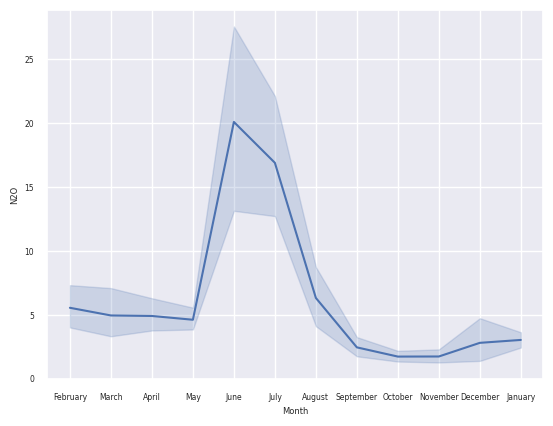

In [16]:
plt.figure()
sns.set(font_scale=0.5)
sns.lineplot(x=df["Month"], y=df["N2O"])

In [17]:
df.columns

Index(['Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month',
       'Vegetation', 'VegType', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT',
       'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM'],
      dtype='object')

In [18]:
# Check unique values in each column

unique_values = df.nunique()
print("Unique values in DataFrame:")
print(unique_values)

Unique values in DataFrame:
Date           1289
Year             15
Experiment        3
DataUse           2
Replication       5
Month            12
Vegetation        3
VegType           1
N2O            1846
N_rate           16
PP2             211
PP7             424
AirT            601
DAF_TD          424
DAF_SD          415
WFPS25cm       1578
NH4            2132
NO3            2191
Clay             10
Sand              9
SOM              10
dtype: int64


In [19]:
df['VegType'].value_counts()

Annual    2246
Name: VegType, dtype: int64

We have only 1 row, let's drop it

In [20]:
df.drop(columns=["VegType"], axis=1, inplace=True)

In [21]:
df.columns

Index(['Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month',
       'Vegetation', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD', 'DAF_SD',
       'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM'],
      dtype='object')

In [22]:
# Check for duplicate rows

duplicates = df.duplicated()
print("\nDuplicate rows:")
print(df[duplicates])


Duplicate rows:
Empty DataFrame
Columns: [Date, Year, Experiment, DataUse, Replication, Month, Vegetation, N2O, N_rate, PP2, PP7, AirT, DAF_TD, DAF_SD, WFPS25cm, NH4, NO3, Clay, Sand, SOM]
Index: []


There is no duplicate data

In [23]:
raw_data = df.copy()

raw_data.head(3)

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Clay,Sand,SOM
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,3.896742,170,0.0,0.00,-2.0,276,241,0.666508,11.046340,22.940812,62.5,637.5,1.174072
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,2.190218,170,0.0,0.00,-2.4,277,242,0.640608,11.008087,22.959578,62.5,637.5,1.174072
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,3.542594,170,3.3,8.64,0.3,285,250,0.728085,10.831669,23.221928,62.5,637.5,1.174072


In [24]:
numerical_columns = raw_data.select_dtypes(exclude="object").columns

numerical_columns

Index(['Date', 'Year', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD',
       'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Clay', 'Sand', 'SOM'],
      dtype='object')

In [25]:
categorical_columns = raw_data.select_dtypes(include="object").columns

categorical_columns

Index(['Experiment', 'DataUse', 'Replication', 'Month', 'Vegetation'], dtype='object')

#### Univariate analysis of Numerical features

In [26]:
def visualize_numerical_features(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64'])

    num_cols = len(numerical_features.columns)
    num_rows = (num_cols // 2) + (num_cols % 2)

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 4*num_rows))

    for i, feature in enumerate(numerical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.histplot(data=df, x=feature, kde=True, ax=ax)
        ax.set_title(f"Distribution of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Frequency")

    # Hide empty subplots if the number of features is odd
    if num_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()
    plt.show()

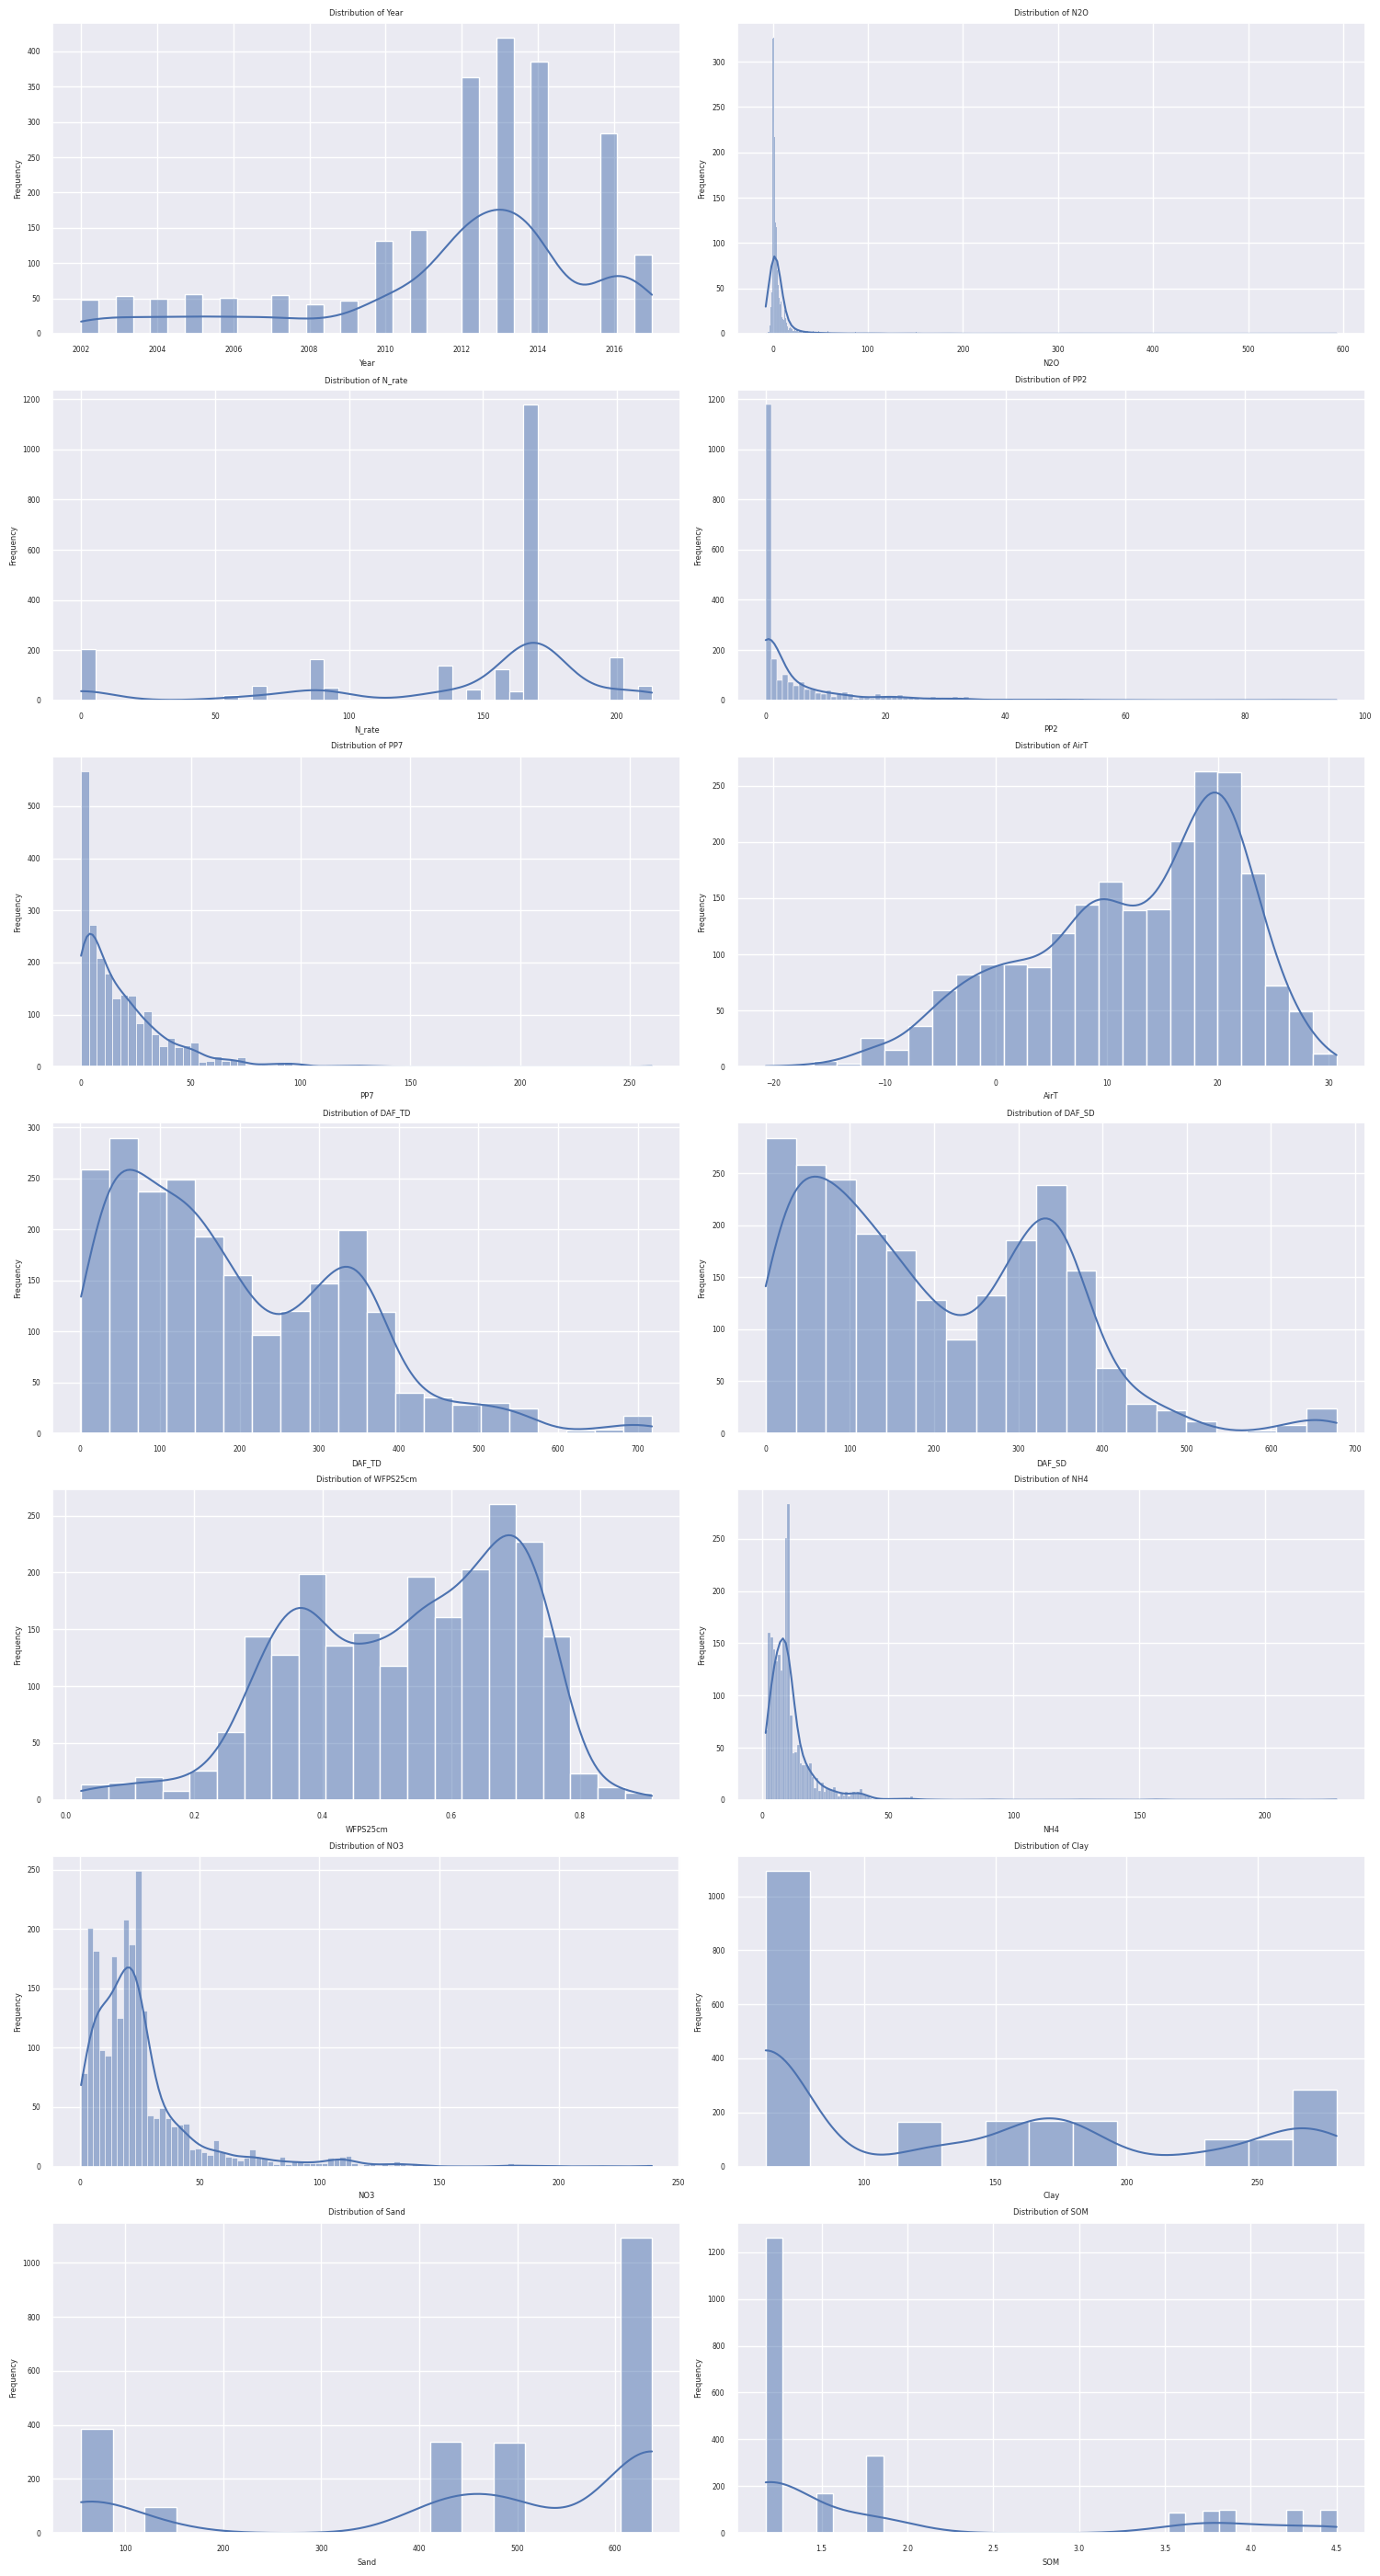

In [27]:
visualize_numerical_features(raw_data)

Most of the datapoints does not follow normal distibution, lets check for outliers

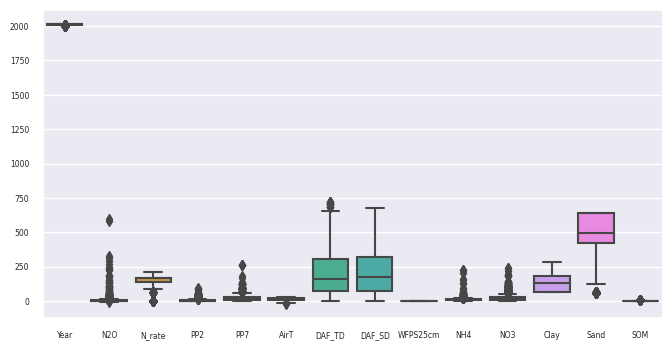

In [28]:
plt.figure(figsize=(8, 4))
sns.boxplot(raw_data)
plt.show()

There are many outliers in the dataset, we will treat them later

#### Univariate Analysis of Categorical features

In [29]:
## Categorical features

def visualize_categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'category'])

    cat_cols = len(categorical_features.columns)
    cat_rows = (cat_cols // 2) + (cat_cols % 2)

    fig, axes = plt.subplots(cat_rows, 2, figsize=(15, 4*cat_rows))

    for i, feature in enumerate(categorical_features.columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]

        sns.countplot(x=feature, data=df, ax=ax)
        ax.set_title(f"Countplot of {feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count")

    # Hide empty subplots if the number of features is odd
    if cat_cols % 2 != 0:
        axes[-1, -1].axis("off")

    plt.tight_layout()

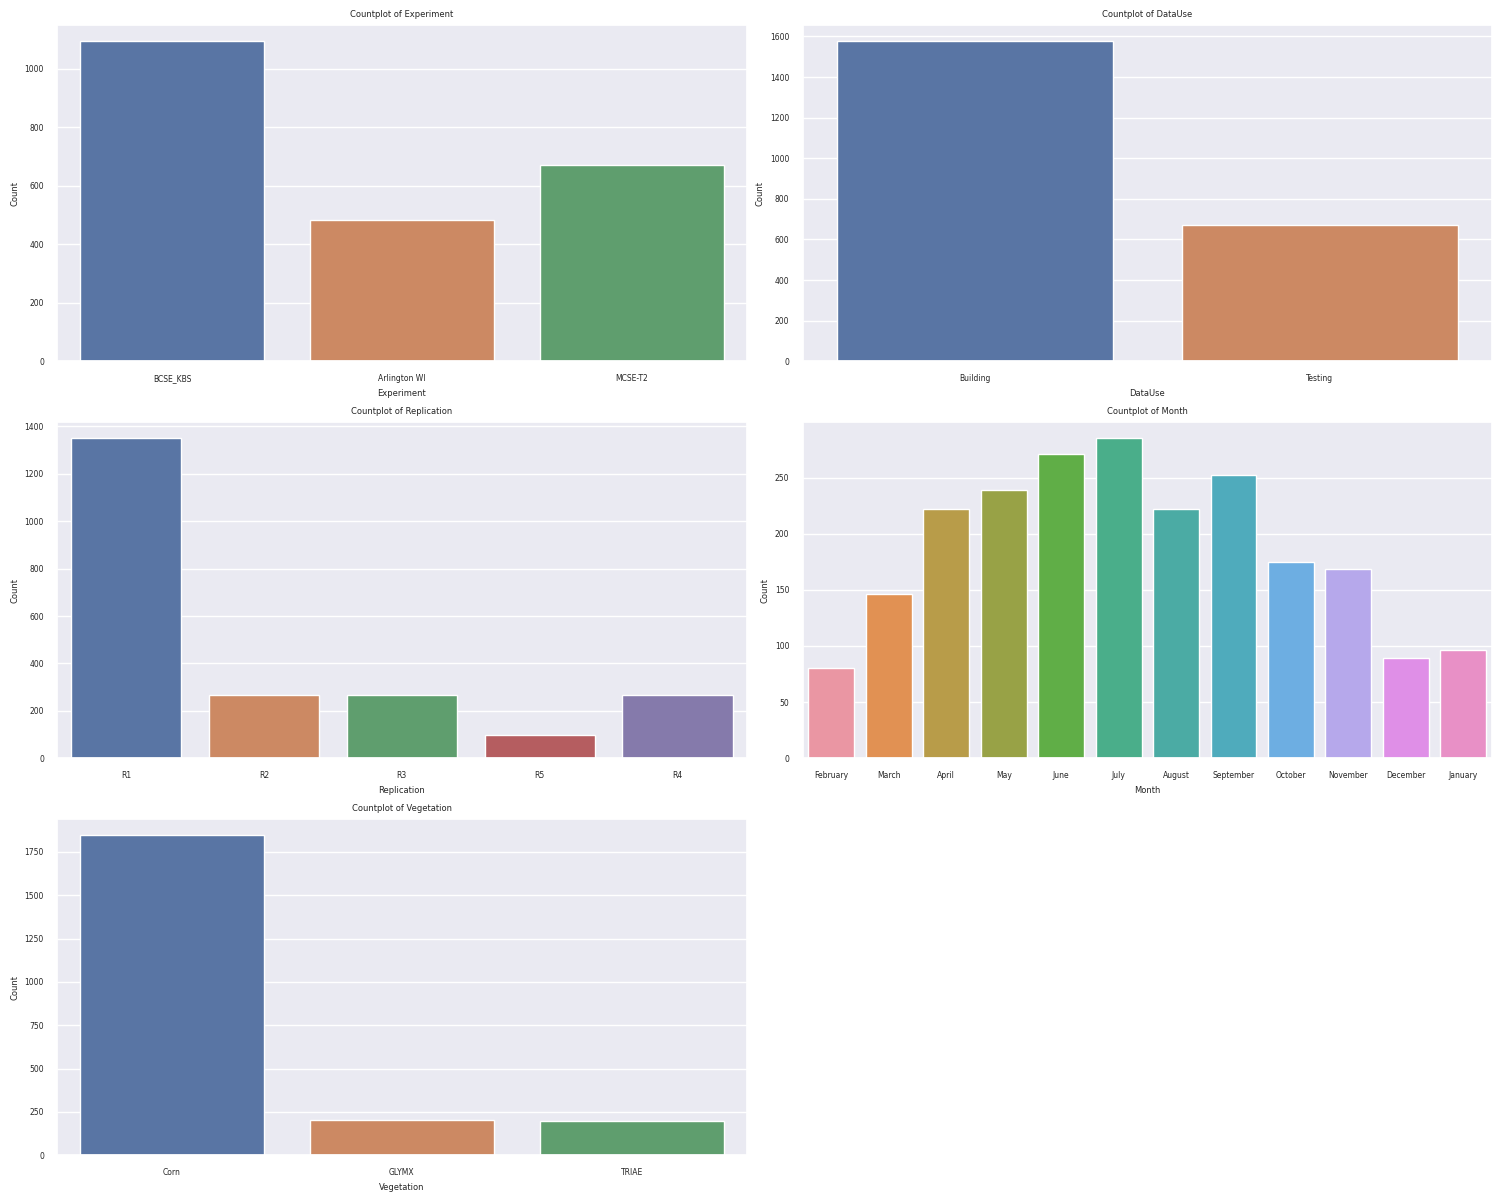

In [30]:
visualize_categorical_features(raw_data)

#### Check Multicollinearity

In [31]:
def check_multicollinearity(df, threshold=0.8):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(15,10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features

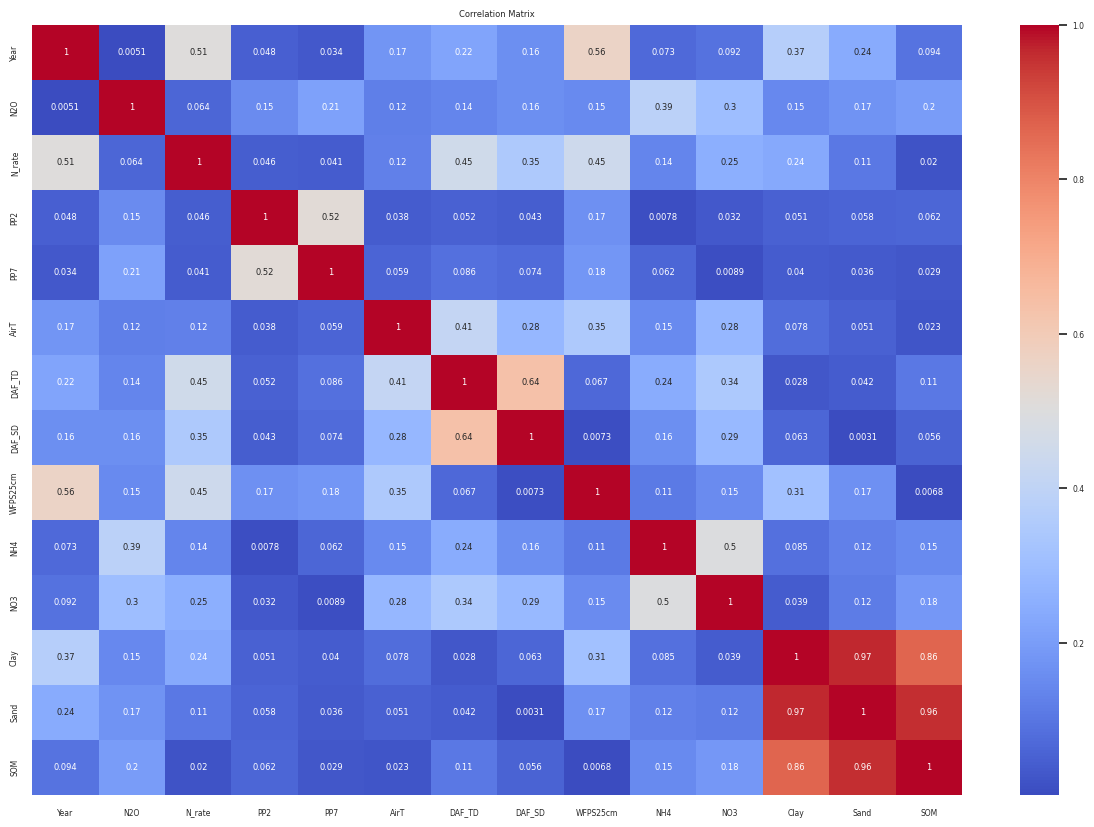

-----------------------------------------------
Multicollinear columns: {'SOM', 'Clay', 'Sand'}


In [32]:
multicollinear_cols = check_multicollinearity(raw_data)

print("-----------------------------------------------")

print("Multicollinear columns:", multicollinear_cols)

The Columns `Sand`, `Clay`, `SOM` are multicollinear, lets remove them.

In [33]:
raw_data.drop(columns=['Sand', 'SOM', 'Clay'], axis=1, inplace=True)

raw_data.head(3)

,Date,Year,Experiment,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,BCSE_KBS,Building,R1,February,Corn,3.896742,170,0.0,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,BCSE_KBS,Building,R1,February,Corn,2.190218,170,0.0,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,BCSE_KBS,Building,R1,February,Corn,3.542594,170,3.3,8.64,0.3,285,250,0.728085,10.831669,23.221928


In [34]:
raw_data.columns

Index(['Date', 'Year', 'Experiment', 'DataUse', 'Replication', 'Month',
       'Vegetation', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD', 'DAF_SD',
       'WFPS25cm', 'NH4', 'NO3'],
      dtype='object')

In [35]:
raw_data.shape

(2246, 17)

In [36]:
raw_data.drop(columns=["Experiment"], axis=1, inplace=True)

raw_data.columns

Index(['Date', 'Year', 'DataUse', 'Replication', 'Month', 'Vegetation', 'N2O',
       'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4',
       'NO3'],
      dtype='object')

In [37]:
raw_data.shape

(2246, 16)

In [38]:
def detect_outliers(df, columns, threshold=3):
    columns_with_outliers = []

    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr

        column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        if not column_outliers.empty:
            columns_with_outliers.append(column)
            print(f"Outliers found in column '{column}'.")

    if not columns_with_outliers:
        print("No outliers found.")

    return columns_with_outliers

In [39]:
num_features = raw_data.select_dtypes(exclude="object").columns

num_features

Index(['Date', 'Year', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD',
       'DAF_SD', 'WFPS25cm', 'NH4', 'NO3'],
      dtype='object')

In [40]:
outlier_columns = detect_outliers(raw_data,  columns = num_features, threshold=3)

print(f"Columns with outliers: {outlier_columns}")

Outliers found in column 'N2O'.
Outliers found in column 'N_rate'.
Outliers found in column 'PP2'.
Outliers found in column 'PP7'.
Outliers found in column 'NH4'.
Outliers found in column 'NO3'.
Columns with outliers: ['N2O', 'N_rate', 'PP2', 'PP7', 'NH4', 'NO3']


In [41]:
raw_data.head(3)

,Date,Year,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,Building,R1,February,Corn,3.896742,170,0.0,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,Building,R1,February,Corn,2.190218,170,0.0,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,Building,R1,February,Corn,3.542594,170,3.3,8.64,0.3,285,250,0.728085,10.831669,23.221928


In [42]:
df[num_features]

,Date,Year,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,3.896742,170,0.00,0.00,-2.00,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,2.190218,170,0.00,0.00,-2.40,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,3.542594,170,3.30,8.64,0.30,285,250,0.728085,10.831669,23.221928
3,2012-02-19,2012,3.342870,170,0.00,8.13,-3.80,286,251,0.686872,10.849792,23.271978
4,2012-03-16,2012,2.947778,170,1.02,8.39,17.60,312,277,0.716221,10.204748,24.206855
...,...,...,...,...,...,...,...,...,...,...,...,...
2241,2013-10-16,2013,1.640000,91,3.81,8.13,10.81,167,167,0.390203,17.061793,5.803681
2242,2013-11-15,2013,0.990000,91,0.00,8.13,5.64,197,197,0.317040,5.624730,5.429873
2243,2013-11-15,2013,-0.200000,91,0.00,8.13,5.64,197,197,0.341428,3.504328,7.239000
2244,2013-11-15,2013,0.300000,91,0.00,8.13,5.64,197,197,0.365815,3.636931,8.434294


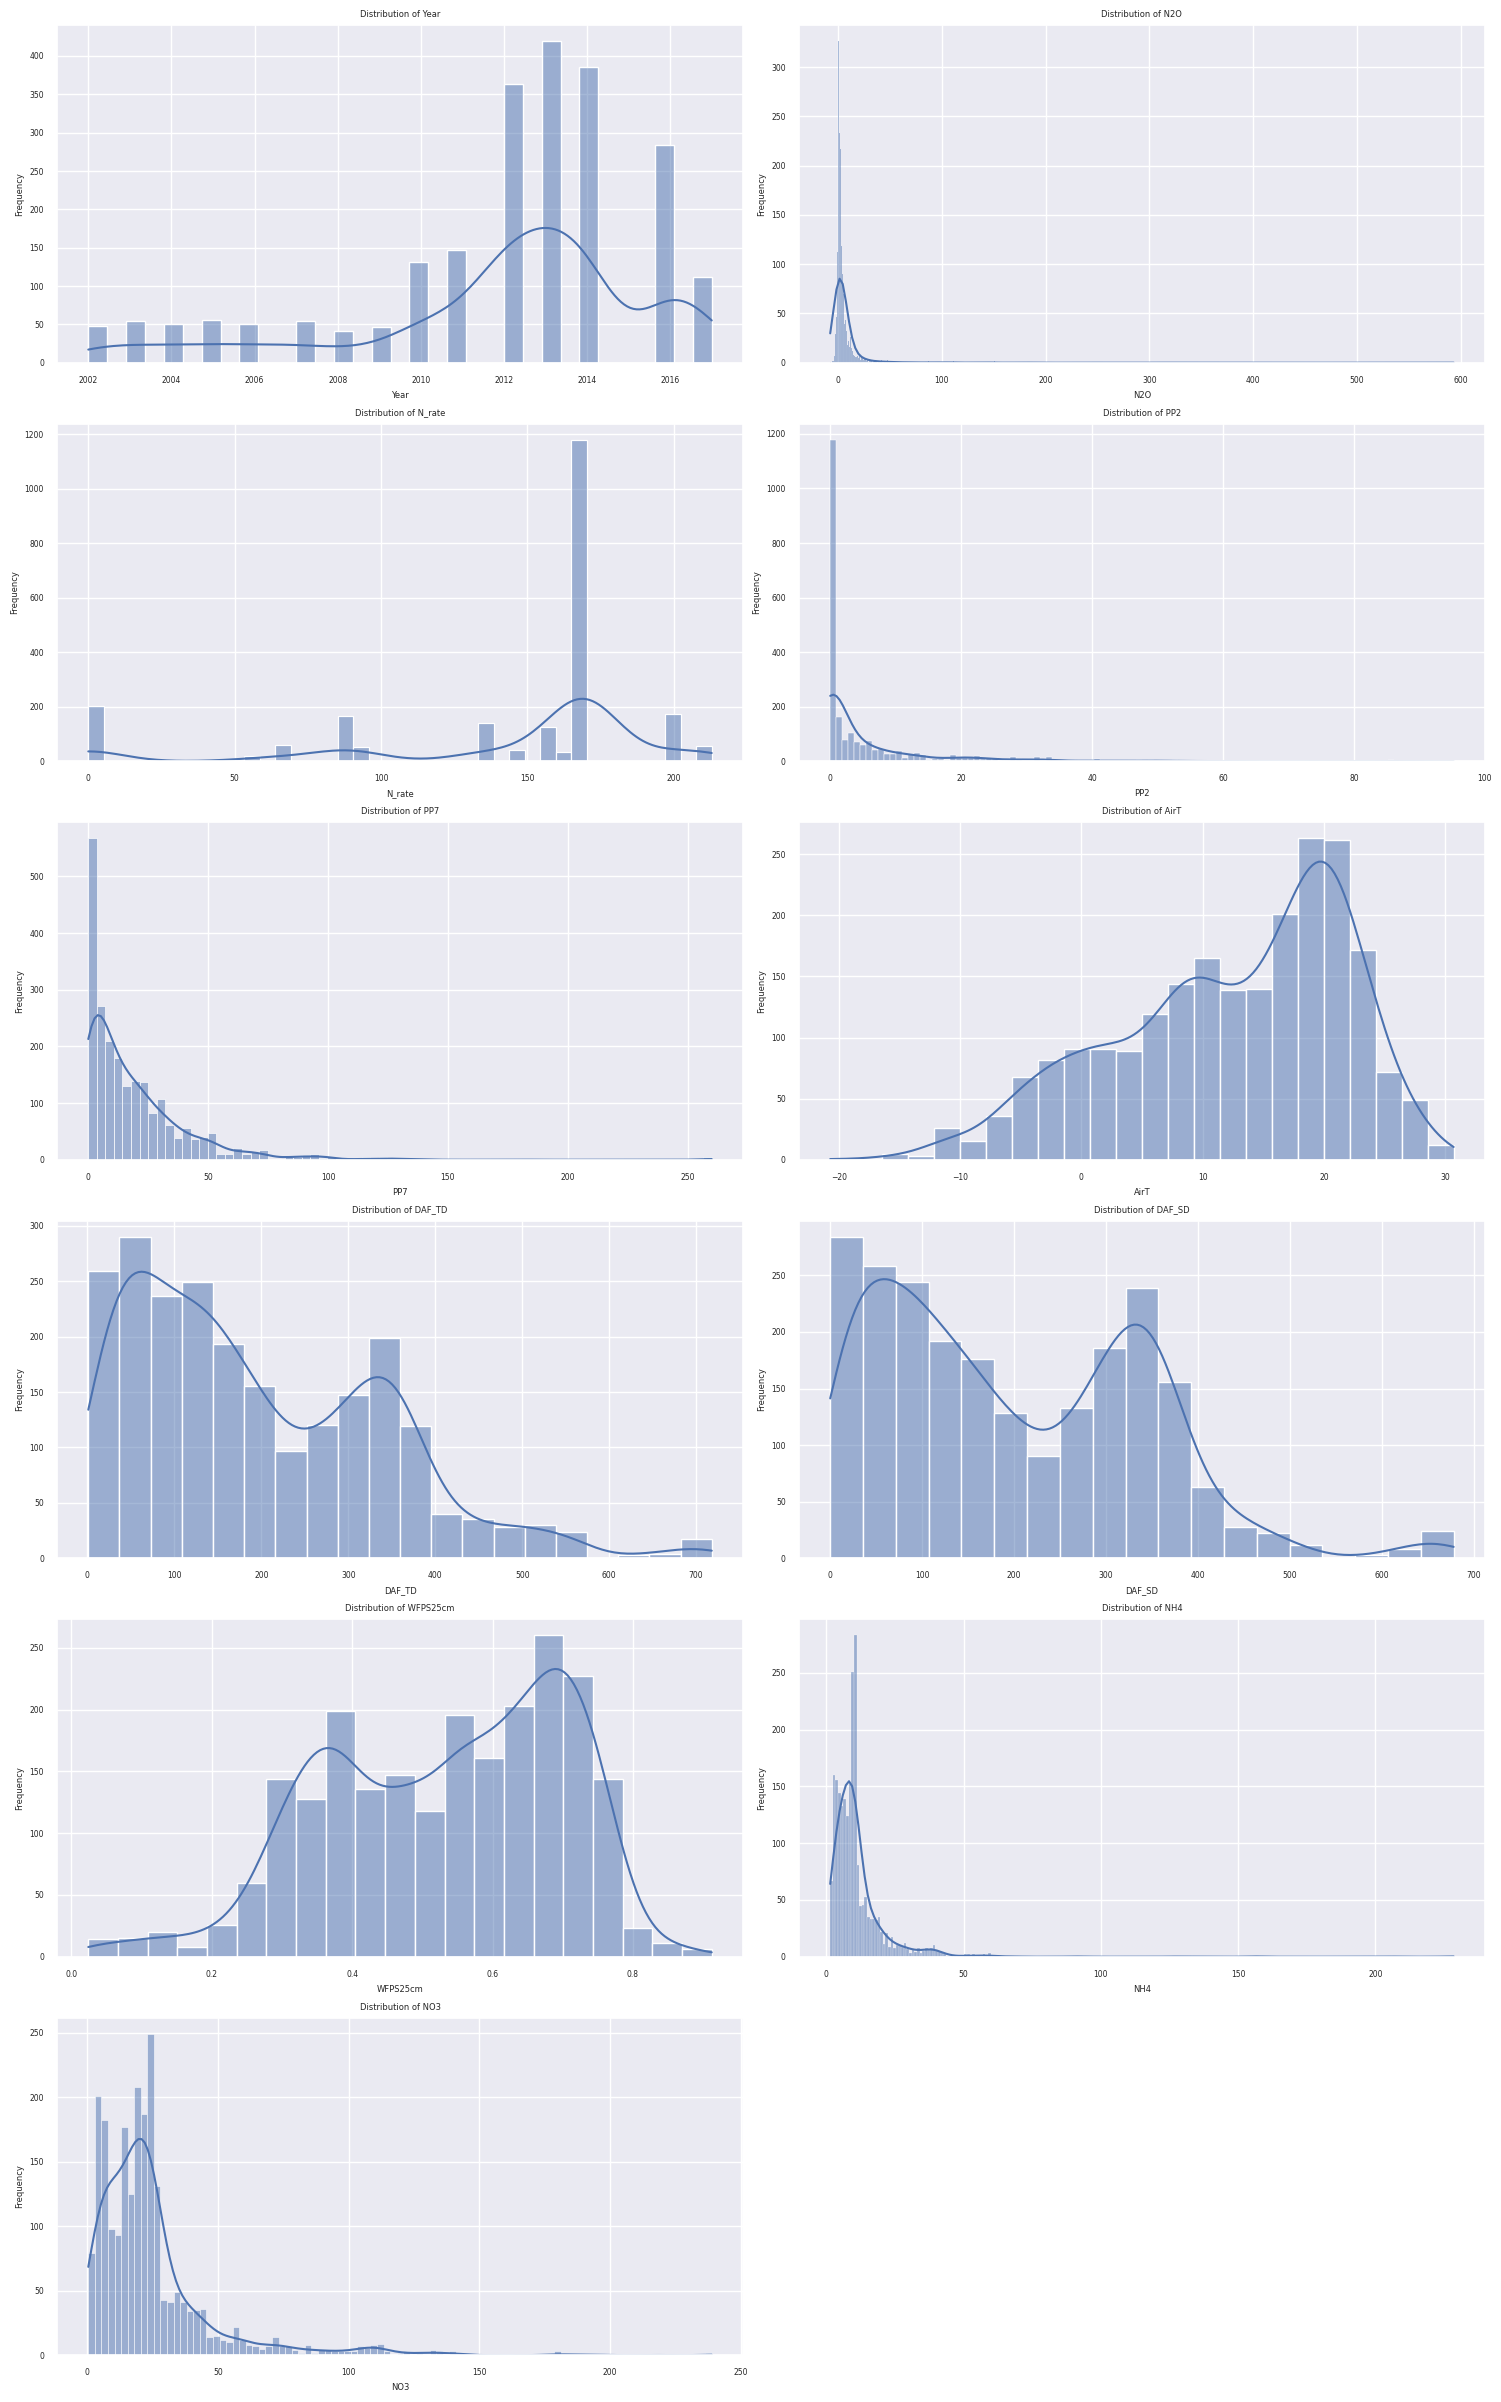

In [43]:
visualize_numerical_features(df[num_features])

In [44]:
raw_data.head()

,Date,Year,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,Building,R1,February,Corn,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,Building,R1,February,Corn,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,Building,R1,February,Corn,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928
3,2012-02-19,2012,Building,R1,February,Corn,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978
4,2012-03-16,2012,Building,R1,March,Corn,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855


In [45]:
num_features = raw_data.select_dtypes(exclude="object").columns

num_features

Index(['Date', 'Year', 'N2O', 'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD',
       'DAF_SD', 'WFPS25cm', 'NH4', 'NO3'],
      dtype='object')

In [46]:
cat_features = raw_data.select_dtypes(include="object").columns

cat_features

Index(['DataUse', 'Replication', 'Month', 'Vegetation'], dtype='object')

In [47]:
raw_data.head()

,Date,Year,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,Building,R1,February,Corn,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,Building,R1,February,Corn,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,Building,R1,February,Corn,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928
3,2012-02-19,2012,Building,R1,February,Corn,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978
4,2012-03-16,2012,Building,R1,March,Corn,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855


In [48]:
raw_data["Replication"].value_counts()

R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64

In [49]:
raw_data["Vegetation"].value_counts()

Corn     1845
GLYMX     204
TRIAE     197
Name: Vegetation, dtype: int64

In [50]:
raw_data["DataUse"].value_counts()

Building    1576
Testing      670
Name: DataUse, dtype: int64

In [51]:
raw_data["Replication"].value_counts()

R1    1350
R2     268
R3     266
R4     265
R5      97
Name: Replication, dtype: int64

In [52]:
## Encoding

months_dict = {'January': 1,
 'February': 2,
 'March': 3,
 'April': 4,
 'May': 5,
 'June': 6,
 'July': 7,
 'August': 8,
 'September': 9,
 'October': 10,
 'November': 11,
 'December': 12}


datause_dict = {"Building": 1, "Testing": 0}

replication_dict = {"R1": 1, "R2": 2, "R3": 3, "R4": 4, "R5": 5}

vegetation_dict = {"Corn": 1, "GLYMX": 2, "TRIAE": 3}

In [53]:
raw_data["Month"] = raw_data["Month"].apply(lambda x: months_dict[x])

In [54]:
raw_data.head(3)

,Date,Year,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,Building,R1,2,Corn,3.896742,170,0.0,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,Building,R1,2,Corn,2.190218,170,0.0,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,Building,R1,2,Corn,3.542594,170,3.3,8.64,0.3,285,250,0.728085,10.831669,23.221928


In [55]:
raw_data["Vegetation"] = raw_data["Vegetation"].apply(lambda x: vegetation_dict[x])
raw_data["DataUse"] = raw_data["DataUse"].apply(lambda x: datause_dict[x])
raw_data["Replication"] = raw_data["Replication"].apply(lambda x: replication_dict[x])


In [56]:
raw_data.head(3)

,Date,Year,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,1,1,2,1,3.896742,170,0.0,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,1,1,2,1,2.190218,170,0.0,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,1,1,2,1,3.542594,170,3.3,8.64,0.3,285,250,0.728085,10.831669,23.221928


In [57]:
raw_final = raw_data.copy()

raw_final.head(4)

,Date,Year,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,1,1,2,1,3.896742,170,0.0,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,1,1,2,1,2.190218,170,0.0,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,1,1,2,1,3.542594,170,3.3,8.64,0.3,285,250,0.728085,10.831669,23.221928
3,2012-02-19,2012,1,1,2,1,3.342870,170,0.0,8.13,-3.8,286,251,0.686872,10.849792,23.271978


In [58]:
raw_data = raw_data.groupby("Date").mean()

In [59]:
raw_data

,Year,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
Date,,,,,,,,,,,,,,,
2002-03-27,2002.0,0.0,2.5,3.0,1.0,0.307500,170.0,0.0000,0.0000,0.55,356.0,312.0,0.370097,5.350371,3.114477
2002-04-24,2002.0,0.0,2.5,4.0,1.0,0.610000,170.0,1.0160,6.2103,12.97,384.0,340.0,0.334452,6.940021,4.172479
2002-05-15,2002.0,0.0,2.5,5.0,1.0,3.935000,164.0,0.0000,39.6113,13.56,5.0,361.0,0.352245,8.441531,9.100344
2002-05-30,2002.0,0.0,2.5,5.0,1.0,1.760000,162.0,0.0000,3.5433,22.00,20.0,376.0,0.271834,9.735911,21.946054
2002-06-11,2002.0,0.0,2.5,11.0,1.0,0.100000,162.0,4.1783,4.1783,3.20,180.0,128.0,0.363700,6.048375,27.415266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-05,2017.0,1.0,1.0,7.0,1.0,21.102827,170.0,0.0000,25.0000,22.40,57.0,15.0,0.524735,22.418589,34.216524
2017-07-06,2017.0,1.0,1.0,7.0,1.0,22.966966,170.0,0.0000,25.0000,23.50,58.0,16.0,0.511859,19.794852,32.905413
2017-07-07,2017.0,1.0,1.0,7.0,1.0,27.918279,170.0,9.0000,11.0000,23.30,59.0,17.0,0.503443,22.270345,33.547679


In [60]:
# This function will return r2 score for any/all of the 3 models mentioned
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        scores['xgb'] = r2_score(y_test, y_pred)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestRegressor(n_estimators=200, criterion='squared_error')
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf'] = r2_score(y_test, y_pred)
        models.append(rf)

    if 'dtree' in kwargs.keys() and kwargs['dtree']:
        dtree = DecisionTreeRegressor(criterion='squared_error')
        dtree.fit(X_train, y_train)
        y_pred = dtree.predict(X_test)
        scores['dtree'] = r2_score(y_test, y_pred)
        models.append(dtree)

    return scores

In [61]:
raw_data.drop(columns=["Year"], axis=1)

,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
Date,,,,,,,,,,,,,,
2002-03-27,0.0,2.5,3.0,1.0,0.307500,170.0,0.0000,0.0000,0.55,356.0,312.0,0.370097,5.350371,3.114477
2002-04-24,0.0,2.5,4.0,1.0,0.610000,170.0,1.0160,6.2103,12.97,384.0,340.0,0.334452,6.940021,4.172479
2002-05-15,0.0,2.5,5.0,1.0,3.935000,164.0,0.0000,39.6113,13.56,5.0,361.0,0.352245,8.441531,9.100344
2002-05-30,0.0,2.5,5.0,1.0,1.760000,162.0,0.0000,3.5433,22.00,20.0,376.0,0.271834,9.735911,21.946054
2002-06-11,0.0,2.5,11.0,1.0,0.100000,162.0,4.1783,4.1783,3.20,180.0,128.0,0.363700,6.048375,27.415266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-05,1.0,1.0,7.0,1.0,21.102827,170.0,0.0000,25.0000,22.40,57.0,15.0,0.524735,22.418589,34.216524
2017-07-06,1.0,1.0,7.0,1.0,22.966966,170.0,0.0000,25.0000,23.50,58.0,16.0,0.511859,19.794852,32.905413
2017-07-07,1.0,1.0,7.0,1.0,27.918279,170.0,9.0000,11.0000,23.30,59.0,17.0,0.503443,22.270345,33.547679


In [62]:
X = raw_final.drop(columns=["N2O", "Date"], axis=1)

y = raw_final["N2O"]

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.6035407903264045,
 'rf': 0.5975981798086314,
 'dtree': 0.24609037141028334}

Here we got score of 60% with best model as xgb

#### Let's drop `Year` and check the performance

In [66]:
raw_final.head()

,Date,Year,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,2012-02-09,2012,1,1,2,1,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,2012-02-10,2012,1,1,2,1,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,2012-02-18,2012,1,1,2,1,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928
3,2012-02-19,2012,1,1,2,1,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978
4,2012-03-16,2012,1,1,3,1,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855


In [67]:
raw_final.columns

Index(['Date', 'Year', 'DataUse', 'Replication', 'Month', 'Vegetation', 'N2O',
       'N_rate', 'PP2', 'PP7', 'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4',
       'NO3'],
      dtype='object')

In [68]:
raw_final.drop(columns=["Date", "Year"], axis=1, inplace=True)

raw_final.columns

Index(['DataUse', 'Replication', 'Month', 'Vegetation', 'N2O', 'N_rate', 'PP2',
       'PP7', 'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3'],
      dtype='object')

In [69]:
X = raw_final.drop(columns=["N2O"], axis=1)

y = raw_final["N2O"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.6086336190154507,
 'rf': 0.6039977991536385,
 'dtree': 0.4735183359024372}

There is no improvement in the scores, Now check by scaling those values

Since, we have features which are unique, lets go with Ordinal Encoder

In [72]:
## Save a copy of the data for future reference

df = raw_final.copy()

df.columns, df.shape

(Index(['DataUse', 'Replication', 'Month', 'Vegetation', 'N2O', 'N_rate', 'PP2',
        'PP7', 'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3'],
       dtype='object'),
 (2246, 14))

In [73]:
df.head(3)

,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,1,1,2,1,3.896742,170,0.0,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,1,1,2,1,2.190218,170,0.0,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,1,1,2,1,3.542594,170,3.3,8.64,0.3,285,250,0.728085,10.831669,23.221928


In [74]:
## Save a copy of the encoded df as csv

df.to_csv("encoded_data.csv", index=False)

In [75]:
data = pd.read_csv("/content/encoded_data.csv")

data.head()

,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,1,1,2,1,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,1,1,2,1,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,1,1,2,1,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928
3,1,1,2,1,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978
4,1,1,3,1,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855


In [76]:
data.head()

,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,1,1,2,1,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,1,1,2,1,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,1,1,2,1,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928
3,1,1,2,1,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978
4,1,1,3,1,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855


In [77]:
data["Vegetation"].value_counts()

1    1845
2     204
3     197
Name: Vegetation, dtype: int64

There is an imbalance in the dataset, lets balance it with SMOTE

In [78]:
major = data.drop(["Vegetation"], axis=1)
minor = data["Vegetation"]

counter = Counter(minor)

for k,v in counter.items():
	per = v / len(minor) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=1845 (82.146%)
Class=2, n=204 (9.083%)
Class=3, n=197 (8.771%)


In [79]:
oversample = SMOTE()
major, minor = oversample.fit_resample(major, minor)
# summarize distribution
counter = Counter(minor)
for k,v in counter.items():
    per = v / len(minor) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=1845 (33.333%)
Class=2, n=1845 (33.333%)
Class=3, n=1845 (33.333%)


In [80]:
df_balanced_scaled = pd.concat([major,minor], axis=1)
df_balanced_scaled

,DataUse,Replication,Month,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation
0,1,1,2,3.896742,170,0.000000,0.000000,-2.000000,276,241,0.666508,11.046340,22.940812,1
1,1,1,2,2.190218,170,0.000000,0.000000,-2.400000,277,242,0.640608,11.008087,22.959578,1
2,1,1,2,3.542594,170,3.300000,8.640000,0.300000,285,250,0.728085,10.831669,23.221928,1
3,1,1,2,3.342870,170,0.000000,8.130000,-3.800000,286,251,0.686872,10.849792,23.271978,1
4,1,1,3,2.947778,170,1.020000,8.390000,17.600000,312,277,0.716221,10.204748,24.206855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,0,2,3,5.393046,90,5.169856,14.113399,11.019493,174,638,0.444502,4.377390,4.247393,3
5531,0,2,4,3.076860,90,0.000000,1.270000,7.350000,181,645,0.553853,4.442286,4.776314,3
5532,0,1,11,0.799710,91,0.000000,8.130000,5.640000,197,197,0.320940,5.285662,5.719166,3
5533,0,3,11,-0.240780,87,1.010000,3.290000,4.690000,198,189,0.450987,14.345237,4.941189,3


#### Scaling the dataset before performing baseline modelling

In [81]:
X = df_balanced_scaled.drop(columns=["N2O"], axis=1)

y = df_balanced_scaled["N2O"]

In [82]:
X.columns

Index(['DataUse', 'Replication', 'Month', 'N_rate', 'PP2', 'PP7', 'AirT',
       'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Vegetation'],
      dtype='object')

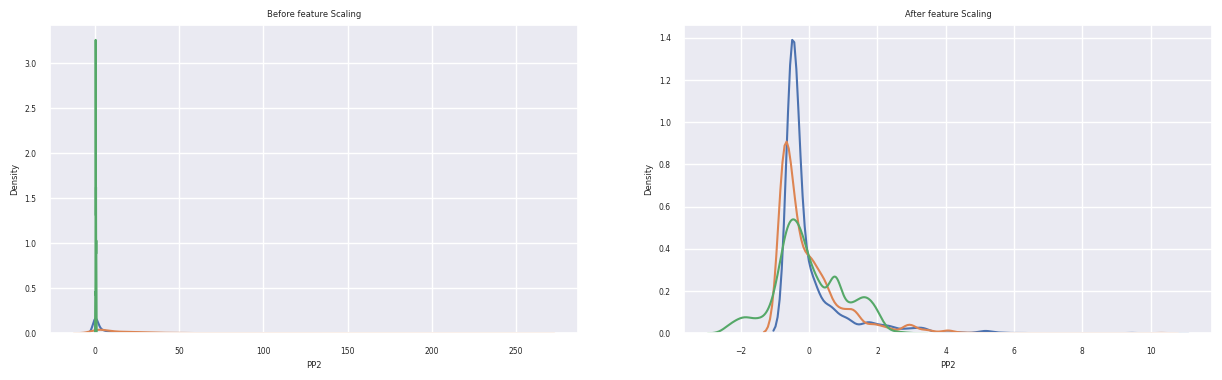

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

# Set titles for subplots
ax1.set_title('Before feature Scaling')
ax2.set_title('After feature Scaling')

# Plot KDE plots before scaling
sns.kdeplot(X["PP2"], ax=ax1)
sns.kdeplot(X["PP7"], ax=ax1)
sns.kdeplot(X["WFPS25cm"], ax=ax1)


# Create an instance of StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame with the original columns
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Plot KDE plots after scaling
sns.kdeplot(X_scaled["PP2"], ax=ax2)
sns.kdeplot(X_scaled["PP7"], ax=ax2)
sns.kdeplot(X_scaled["WFPS25cm"], ax=ax2)


# Display the plots
plt.show()

In [84]:
scaled_data = pd.concat([X_scaled, y], axis=1)

scaled_data.head(3)

,DataUse,Replication,Month,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation,N2O
0,1.584947,-0.950336,-1.806053,1.237385,-0.512106,-0.795186,-2.021302,0.035786,-0.059954,1.447154,0.259416,0.409088,-1.224745,3.896742
1,1.584947,-0.950336,-1.806053,1.237385,-0.512106,-0.795186,-2.071809,0.041397,-0.054276,1.290808,0.255190,0.410115,-1.224745,2.190218
2,1.584947,-0.950336,-1.806053,1.237385,-0.128064,-0.427646,-1.730887,0.086289,-0.008856,1.818861,0.235701,0.424467,-1.224745,3.542594


In [85]:
scaled_data.shape

(5535, 14)


We will only train the model with 3 Selected algorithms like XGBoost, RandomForest and DecisionTree - because they are Not Sensitive to Outliers and can handle outliers.

In [86]:
scaled_data.head(3)

,DataUse,Replication,Month,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation,N2O
0,1.584947,-0.950336,-1.806053,1.237385,-0.512106,-0.795186,-2.021302,0.035786,-0.059954,1.447154,0.259416,0.409088,-1.224745,3.896742
1,1.584947,-0.950336,-1.806053,1.237385,-0.512106,-0.795186,-2.071809,0.041397,-0.054276,1.290808,0.255190,0.410115,-1.224745,2.190218
2,1.584947,-0.950336,-1.806053,1.237385,-0.128064,-0.427646,-1.730887,0.086289,-0.008856,1.818861,0.235701,0.424467,-1.224745,3.542594


In [87]:
scaled_data["N_rate"].value_counts()

-1.219147    1845
 1.237385    1107
 0.081370     558
 0.023569     492
 0.095820     358
 0.038020     328
 1.699791     172
 1.049533     125
 0.731629     121
 0.052470      73
 1.194035      72
-0.250984      58
 1.858744      56
 0.066920      55
 0.905031      41
 1.121784      35
-0.409936      21
 0.717178      18
Name: N_rate, dtype: int64

In [88]:
data_scaled = scaled_data.copy()

data_scaled.head(2)

,DataUse,Replication,Month,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation,N2O
0,1.584947,-0.950336,-1.806053,1.237385,-0.512106,-0.795186,-2.021302,0.035786,-0.059954,1.447154,0.259416,0.409088,-1.224745,3.896742
1,1.584947,-0.950336,-1.806053,1.237385,-0.512106,-0.795186,-2.071809,0.041397,-0.054276,1.290808,0.255190,0.410115,-1.224745,2.190218


In [89]:
X = data_scaled.drop(columns=["N2O"], axis=1)

y = data_scaled["N2O"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.33538313065830316,
 'rf': 0.36379509493412976,
 'dtree': 0.32675776030360393}

Results detoriated we can choose either scaling or No scaling

Not much relevance of `N_rate` we can drop it from the scaled_data

In [92]:
scaled_data.drop(columns=["N_rate"], axis=1, inplace=True)

In [93]:
scaled_data.columns

Index(['DataUse', 'Replication', 'Month', 'PP2', 'PP7', 'AirT', 'DAF_TD',
       'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Vegetation', 'N2O'],
      dtype='object')

#### Prepare the X and y variables

In [94]:
X = scaled_data.drop(columns=["N2O"], axis=1)

y = scaled_data["N2O"]

In [95]:
X.head(3)

,DataUse,Replication,Month,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation
0,1.584947,-0.950336,-1.806053,-0.512106,-0.795186,-2.021302,0.035786,-0.059954,1.447154,0.259416,0.409088,-1.224745
1,1.584947,-0.950336,-1.806053,-0.512106,-0.795186,-2.071809,0.041397,-0.054276,1.290808,0.255190,0.410115,-1.224745
2,1.584947,-0.950336,-1.806053,-0.128064,-0.427646,-1.730887,0.086289,-0.008856,1.818861,0.235701,0.424467,-1.224745


#### Split the dataset into train and test sets

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.32879782236112054,
 'rf': 0.3767828431664405,
 'dtree': 0.33037099860794017}

We got our best model as rf ie. RandomForest Model with `r2_score` of 38%, very poor score

let's check by doing feature selection, does the `r2_score` improves ?

##### For Feature Selection please refer here: - https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression

In [99]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)

    return X_train_fs, X_test_fs, fs_corr


def fs_score_plot(fs_func):

    for i in range(len(fs_func.scores_)):
        print('Feature %d: %f' % (i, fs_func.scores_[i]))
    # plot the scores
    x = [i for i in range(len(fs_func.scores_))]
    y = fs_func.scores_
    plt.bar(x, y)
    plt.xticks(x, X_train.columns.to_list(), fontsize=12, rotation=90)
    plt.show()

def select_features_model_based(estimator, X_train, y_train, X_test, n=None):

    rfe = RFE(estimator=estimator, n_features_to_select=n)
    rfe.fit(X_train,y_train)
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    return X_train_rfe, X_test_rfe, rfe

def rfe_score_plot(rfe):

    plt.figure(figsize=(7,5))
    sns.barplot(y =X_train.columns, x = max(rfe.ranking_) - rfe.ranking_)
    plt.show()

Feature 0: 111.756135
Feature 1: 26.254090
Feature 2: 5.705881
Feature 3: 82.959064
Feature 4: 93.019668
Feature 5: 34.699644
Feature 6: 86.036233
Feature 7: 85.214386
Feature 8: 157.924966
Feature 9: 975.354687
Feature 10: 501.086097
Feature 11: 63.800179


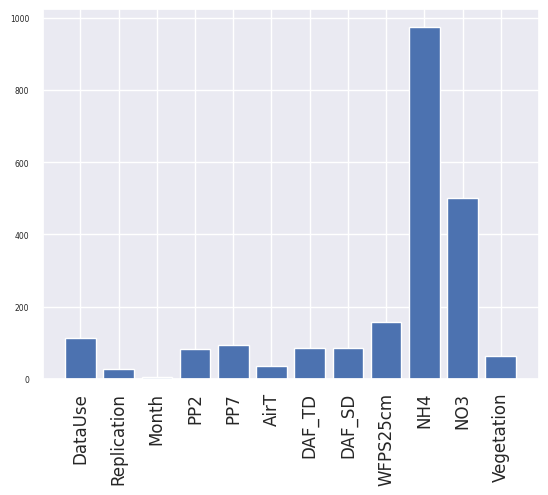

array([-1.12366352,  0.34993437,  0.24999365])

In [100]:
X_train_fs, X_test_fs, fs_ = select_features_corr_based(X_train, y_train, X_test, x=7)
fs_score_plot(fs_)

cv = cross_val_score(XGBRegressor(), X_train_fs, y_train, scoring='r2', cv=3, n_jobs=-1)
cv

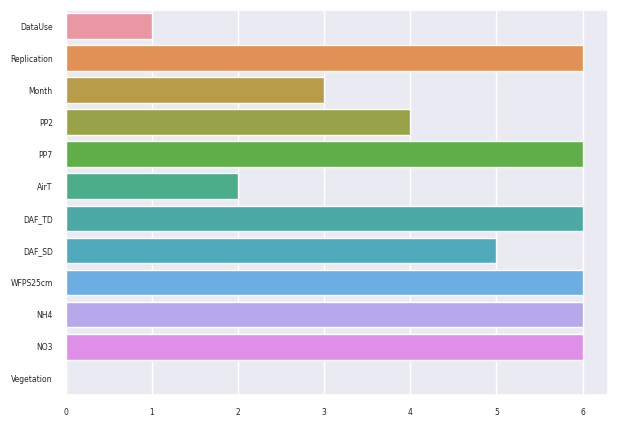

array([-1.04958931,  0.20598397,  0.21725706])

In [101]:
X_train_rfe, X_test_rfe, rfe_ = select_features_model_based(XGBRegressor(), X_train, y_train, X_test, n=6)
plt.figure(figsize=(7,5))
sns.barplot(y =X_train.columns, x = max(rfe_.ranking_) - rfe_.ranking_)
plt.show()

cv = cross_val_score(XGBRegressor(), X_train_rfe, y_train, scoring='r2', cv=3, n_jobs=-1)
cv

In [102]:
print(modelling(X_train_fs, y_train, X_test_fs, y_test, xgb=True, rf=True, dtree=True))
print(modelling(X_train_rfe, y_train, X_test_rfe, y_test, xgb=True, rf=True, dtree=True))

{'xgb': 0.3555636378965521, 'rf': 0.4068807554543725, 'dtree': 0.3351365478442232}
{'xgb': 0.349012653117318, 'rf': 0.3707653754095179, 'dtree': 0.3284710066195574}


Not much improvement in the scores

#### Let's check on unscaled dataset what is the performance

In [103]:
df = pd.read_csv("/content/encoded_data.csv")

df.head()

,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,1,1,2,1,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,1,1,2,1,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,1,1,2,1,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928
3,1,1,2,1,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978
4,1,1,3,1,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855


In [104]:
df['Vegetation'].value_counts()

1    1845
2     204
3     197
Name: Vegetation, dtype: int64

There is imbalance in the `Vegetation` feature lets handle it

In [105]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [106]:
major = df.drop(["Vegetation"], axis=1)
minor = df["Vegetation"]

counter = Counter(minor)

for k,v in counter.items():
	per = v / len(minor) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=1845 (82.146%)
Class=2, n=204 (9.083%)
Class=3, n=197 (8.771%)


In [107]:
oversample = SMOTE()
major, minor = oversample.fit_resample(major, minor)
# summarize distribution
counter = Counter(minor)
for k,v in counter.items():
    per = v / len(minor) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=1, n=1845 (33.333%)
Class=2, n=1845 (33.333%)
Class=3, n=1845 (33.333%)


In [108]:
df_balanced = pd.concat([major,minor], axis=1)
df_balanced

,DataUse,Replication,Month,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation
0,1,1,2,3.896742,170,0.000000,0.000000,-2.000000,276,241,0.666508,11.046340,22.940812,1
1,1,1,2,2.190218,170,0.000000,0.000000,-2.400000,277,242,0.640608,11.008087,22.959578,1
2,1,1,2,3.542594,170,3.300000,8.640000,0.300000,285,250,0.728085,10.831669,23.221928,1
3,1,1,2,3.342870,170,0.000000,8.130000,-3.800000,286,251,0.686872,10.849792,23.271978,1
4,1,1,3,2.947778,170,1.020000,8.390000,17.600000,312,277,0.716221,10.204748,24.206855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,0,2,4,0.784696,91,4.830000,5.080000,7.010000,704,664,0.390203,4.305012,6.133069,3
5531,0,2,11,-0.283944,87,1.010000,3.290000,4.690000,198,189,0.340868,12.267892,9.000894,3
5532,0,2,9,2.208334,86,20.757344,22.109051,15.879401,176,151,0.345881,3.798405,6.787597,3
5533,0,1,11,0.400000,87,0.895166,3.840295,4.798012,197,189,0.319813,8.887462,4.157509,3


In [109]:
df_balanced["Vegetation"].value_counts()

1    1845
2    1845
3    1845
Name: Vegetation, dtype: int64

#### Model Testing on balanced unscaled dataset

In [110]:
X = df_balanced.drop("N2O", axis=1)
y = df_balanced["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [111]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.44632371876908694,
 'rf': 0.4571912936177188,
 'dtree': 0.22122145591460207}

In [112]:
df_balanced.columns

Index(['DataUse', 'Replication', 'Month', 'N2O', 'N_rate', 'PP2', 'PP7',
       'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3', 'Vegetation'],
      dtype='object')

We got an slight improvement in the model results

In [113]:
df_balanced.head(3)

,DataUse,Replication,Month,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation
0,1,1,2,3.896742,170,0.0,0.00,-2.0,276,241,0.666508,11.046340,22.940812,1
1,1,1,2,2.190218,170,0.0,0.00,-2.4,277,242,0.640608,11.008087,22.959578,1
2,1,1,2,3.542594,170,3.3,8.64,0.3,285,250,0.728085,10.831669,23.221928,1


In [114]:
df_balanced.drop(columns=["N_rate"], axis=1)

,DataUse,Replication,Month,N2O,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation
0,1,1,2,3.896742,0.000000,0.000000,-2.000000,276,241,0.666508,11.046340,22.940812,1
1,1,1,2,2.190218,0.000000,0.000000,-2.400000,277,242,0.640608,11.008087,22.959578,1
2,1,1,2,3.542594,3.300000,8.640000,0.300000,285,250,0.728085,10.831669,23.221928,1
3,1,1,2,3.342870,0.000000,8.130000,-3.800000,286,251,0.686872,10.849792,23.271978,1
4,1,1,3,2.947778,1.020000,8.390000,17.600000,312,277,0.716221,10.204748,24.206855,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5530,0,2,4,0.784696,4.830000,5.080000,7.010000,704,664,0.390203,4.305012,6.133069,3
5531,0,2,11,-0.283944,1.010000,3.290000,4.690000,198,189,0.340868,12.267892,9.000894,3
5532,0,2,9,2.208334,20.757344,22.109051,15.879401,176,151,0.345881,3.798405,6.787597,3
5533,0,1,11,0.400000,0.895166,3.840295,4.798012,197,189,0.319813,8.887462,4.157509,3


In [115]:
X = df_balanced.drop("N2O", axis=1)
y = df_balanced["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [116]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.44632371876908694,
 'rf': 0.4540107881041515,
 'dtree': 0.14576366459730872}

No Improvement !!

lets apply Robust Scaler

In [117]:
from sklearn.preprocessing import RobustScaler

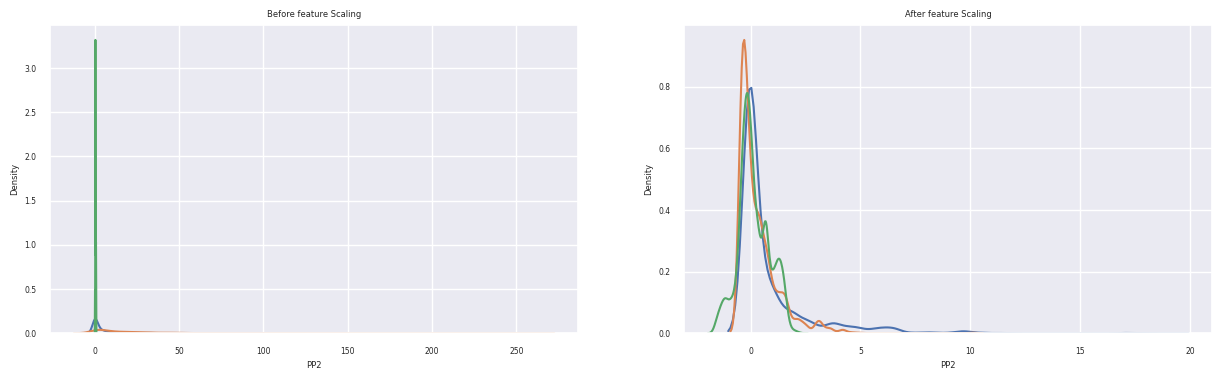

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))

# Set titles for subplots
ax1.set_title('Before feature Scaling')
ax2.set_title('After feature Scaling')

# Plot KDE plots before scaling
sns.kdeplot(X["PP2"], ax=ax1)
sns.kdeplot(X["PP7"], ax=ax1)
sns.kdeplot(X["WFPS25cm"], ax=ax1)


# Create an instance of StandardScaler
scaler = RobustScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled array back to a DataFrame with the original columns
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Plot KDE plots after scaling
sns.kdeplot(X_scaled["PP2"], ax=ax2)
sns.kdeplot(X_scaled["PP7"], ax=ax2)
sns.kdeplot(X_scaled["WFPS25cm"], ax=ax2)


# Display the plots
plt.show()

In [119]:
rb_scaled_data = pd.concat([X_scaled, y], axis=1)

rb_scaled_data.head(3)

,DataUse,Replication,Month,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3,Vegetation,N2O
0,1.0,-0.5,-1.25,0.497006,-0.076248,-0.420290,-1.707488,0.013559,-0.052448,1.176098,0.786337,1.004594,-0.5,3.896742
1,1.0,-0.5,-1.25,0.497006,-0.076248,-0.420290,-1.744851,0.016949,-0.048951,1.065853,0.779727,1.005935,-0.5,2.190218
2,1.0,-0.5,-1.25,0.497006,0.584167,-0.071796,-1.492650,0.044068,-0.020979,1.438202,0.749244,1.024682,-0.5,3.542594


In [120]:
X = rb_scaled_data.drop("N2O", axis=1)
y = rb_scaled_data["N2O"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [121]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.4423164592843454,
 'rf': 0.4632303906869739,
 'dtree': 0.011067020659670801}

In [122]:
raw_final.columns

Index(['DataUse', 'Replication', 'Month', 'Vegetation', 'N2O', 'N_rate', 'PP2',
       'PP7', 'AirT', 'DAF_TD', 'DAF_SD', 'WFPS25cm', 'NH4', 'NO3'],
      dtype='object')

In [123]:
raw_final.head()

,DataUse,Replication,Month,Vegetation,N2O,N_rate,PP2,PP7,AirT,DAF_TD,DAF_SD,WFPS25cm,NH4,NO3
0,1,1,2,1,3.896742,170,0.00,0.00,-2.0,276,241,0.666508,11.046340,22.940812
1,1,1,2,1,2.190218,170,0.00,0.00,-2.4,277,242,0.640608,11.008087,22.959578
2,1,1,2,1,3.542594,170,3.30,8.64,0.3,285,250,0.728085,10.831669,23.221928
3,1,1,2,1,3.342870,170,0.00,8.13,-3.8,286,251,0.686872,10.849792,23.271978
4,1,1,3,1,2.947778,170,1.02,8.39,17.6,312,277,0.716221,10.204748,24.206855


In [124]:
X = raw_final.drop(columns=["N2O"], axis=1)

y = raw_final["N2O"]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
print("Shape of Training data: ", X_train.shape, y_train.shape)

print("------------------------------------------------------")

print("Shape of Testing data: ", X_test.shape, y_test.shape)

Shape of Training data:  (1796, 13) (1796,)
------------------------------------------------------
Shape of Testing data:  (450, 13) (450,)


In [127]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.6086336190154507,
 'rf': 0.6126410614102816,
 'dtree': 0.24700849341605868}

#### We will go with the final model as xgb

In [128]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.6086336190154507,
 'rf': 0.604011018858577,
 'dtree': 0.38134433680588686}

r2 score for base model: 0.608634


<Axes: >

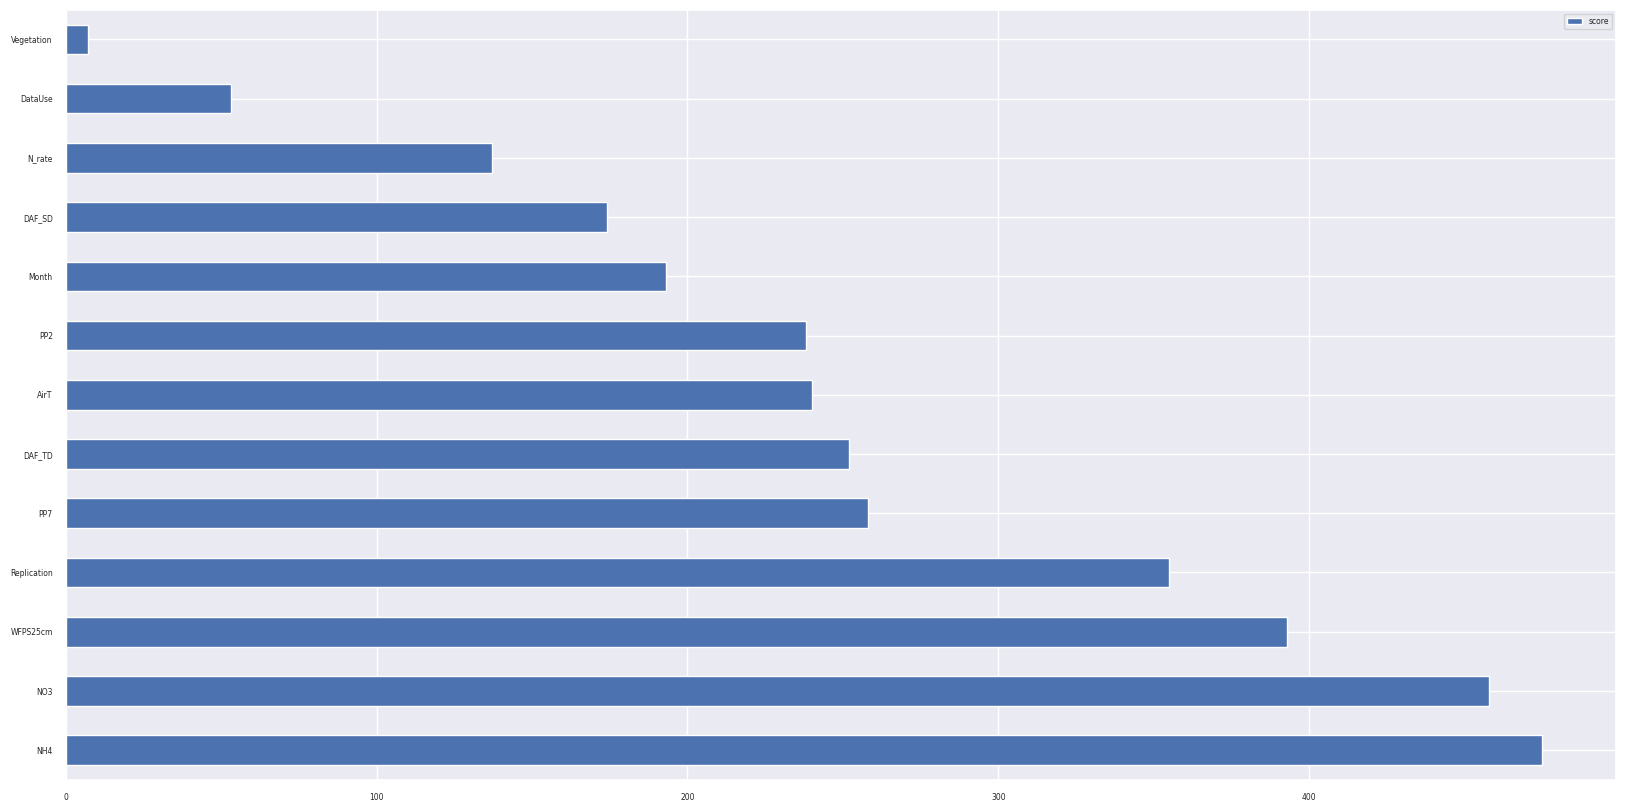

In [129]:
boost = XGBRegressor()
boost.fit(X_train, y_train)
y_pred = boost.predict(X_test)
print("r2 score for base model: %f" % r2_score(y_test, y_pred))

feature_important = boost.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh', figsize = (20,10))

In [130]:
modelling(X_train, y_train, X_test, y_test, xgb=True, rf=True, dtree=True)

{'xgb': 0.6086336190154507,
 'rf': 0.6256372106784458,
 'dtree': 0.4026380744290201}

In [131]:
feats = data.index[:10].to_list()
feats

['NH4',
 'NO3',
 'WFPS25cm',
 'Replication',
 'PP7',
 'DAF_TD',
 'AirT',
 'PP2',
 'Month',
 'DAF_SD']

In [132]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [133]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso, Ridge

In [135]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 24.4386
- Mean Absolute Error: 9.3833
- R2 Score: 0.2300
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.2904
- Mean Absolute Error: 10.4052
- R2 Score: 0.2182


Lasso
Model performance for Training set
- Root Mean Squared Error: 24.7484
- Mean Absolute Error: 8.3802
- R2 Score: 0.2104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.2653
- Mean Absolute Error: 9.3503
- R2 Score: 0.2196


Ridge
Model performance for Training set
- Root Mean Squared Error: 24.4392
- Mean Absolute Error: 9.3296
- R2 Score: 0.2300
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 27.2935
- Mean Absolute Error: 10.3537
- R2 Score: 0.2180


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 19.7108
- Mean Absolute Error: 4.8465
- R2 Score: 0.4991
--------------

In [136]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.608634
5,Random Forest Regressor,0.605703
4,Decision Tree,0.408977
3,K-Neighbors Regressor,0.332081
1,Lasso,0.219613
0,Linear Regression,0.218177
2,Ridge,0.218001
7,AdaBoost Regressor,-0.637403


In [137]:
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 59.56


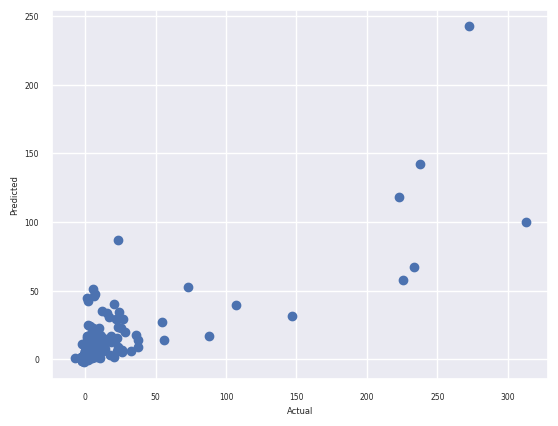

In [138]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

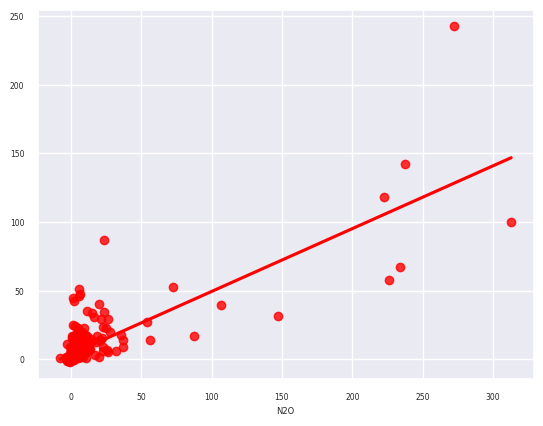

In [139]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [140]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1732,3.620000,1.911443,1.708557
482,0.000000,-0.787427,0.787427
1565,2.034470,1.590608,0.443862
247,3.662710,5.181319,-1.518609
1654,4.240000,8.249137,-4.009137
...,...,...,...
115,1.721761,2.264422,-0.542661
76,2.000429,1.059929,0.940500
416,0.000000,0.585175,-0.585175
1121,2.079670,5.706884,-3.627214


#### Hyperparamter Tuning using optuna

In [141]:
from sklearn.model_selection import KFold

In [142]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [153]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

def rf_objective(trial):
    # Use the trial object to suggest values for the RandomForestRegressor hyperparameters
    n_estimators = trial.suggest_int("n_estimators", 100, 500, step=100)
    max_depth = trial.suggest_int("max_depth", 5, 15)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    # Define the model with the suggested hyperparameters
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)

    # Calculate the score with 10-fold cross-validation, which returns a list of scores
    # Scoring is defined as negative RMSE as it is what this Kaggle competition uses to evaluate the result
    scores = cross_val_score(rf, X, y,
                             cv=KFold(n_splits=10, shuffle=True, random_state=42),
                             scoring="neg_root_mean_squared_error")

    # Return the mean of 10 scores
    return scores.mean()


In [155]:
# Create Study object
study = optuna.create_study(direction="maximize")

# Optimize the study, use more trials to obtain a better result, use fewer trials to be more cost-efficient
study.optimize(rf_objective, n_trials=10)  # Use more trials for better results

# Print the result
best_params = study.best_params
best_score = study.best_value
print(f"Best score: {best_score}\n")
print(f"Optimized parameters: {best_params}\n")


[I 2023-06-14 14:55:08,942] A new study created in memory with name: no-name-e4c41665-96fc-43cd-bfc5-5c9c0d86028f
[I 2023-06-14 14:55:46,068] Trial 0 finished with value: -22.210911690134832 and parameters: {'n_estimators': 500, 'max_depth': 7, 'min_samples_split': 10}. Best is trial 0 with value: -22.210911690134832.
[I 2023-06-14 14:56:12,349] Trial 1 finished with value: -21.334580541681433 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 6}. Best is trial 1 with value: -21.334580541681433.
[I 2023-06-14 14:56:51,831] Trial 2 finished with value: -21.59562944732069 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 8}. Best is trial 1 with value: -21.334580541681433.
[I 2023-06-14 14:57:03,786] Trial 3 finished with value: -21.872176021810155 and parameters: {'n_estimators': 100, 'max_depth': 13, 'min_samples_split': 8}. Best is trial 1 with value: -21.334580541681433.
[I 2023-06-14 14:57:29,095] Trial 4 finished with value: -21.82

Best score: -21.334580541681433

Optimized parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 6}



In [160]:
rf = RandomForestRegressor(
        max_depth=15,
        min_samples_split=6,
        n_estimators=200,
        n_jobs=-1)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_split=6, n_estimators=200,
                      n_jobs=-1)

In [161]:
y_preds = rf.predict(X_test)


In [164]:
print("Score of the model is: ", r2_score(y_test, y_preds))
print("MSE of the model is: ", mean_squared_error(y_test, y_preds))
print("RMSE of the models is: ", np.sqrt(mean_squared_error(y_test, y_preds)))
print('MAE of the model is: ', mean_absolute_error(y_test, y_preds))

Score of the model is:  0.6147232709057445
MSE of the model is:  367.01501575681846
RMSE of the models is:  19.157635964722225
MAE of the model is:  6.092977464839859
